In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [27]:
data = pd.read_csv("Data/cleaned_data.csv")
data = data.drop("Unnamed: 0",axis=1)
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,Male,39,Higher Degree,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,High School Diploma/GED,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,High School,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,College,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,College,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,Male,68,High School,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3846,Male,50,High School,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3847,Male,51,College,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3848,Female,48,High School Diploma/GED,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


### Problems :
1 - Convert Categorical data into numerical
    * Label Encoder > high school :1 , college : 2 , Diploma : 3
    * One Hot Encoder > 

2 - unbalanced data
     1 - UnderSampling
     2 - OverSampling
     3 - Smote
3 - Normalization , Scaling

In [28]:
# categorical = []
# numerical = []
# for col in data.columns:
#     if data[col].dtype == "O":
#         categorical.append(col)
#     else:
#         numerical.append(col)        

In [29]:
categorical = [col for col in data.columns if data[col].dtype == "O"]
categorical

['gender', 'education']

In [30]:
numerical = [col for col in data.columns if data[col].dtype != "O"]
numerical = numerical[0:-1]
numerical

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [31]:
ros = RandomOverSampler()

In [32]:
X = data.drop('target', axis=1)
Y = data['target']

In [33]:
x_sampled, y_sampled = ros.fit_resample(X,Y)

In [34]:
list(y_sampled).count(1) , list(y_sampled).count(0)

(3256, 3256)

In [35]:
x_sampled

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,Male,39,Higher Degree,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,Female,46,High School Diploma/GED,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,Male,48,High School,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,Female,61,College,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,Female,46,College,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,Male,50,High School,0,0.0,0.0,0,1,0,257.0,127.0,82.0,32.23,75.0,117.0
6508,Female,63,High School Diploma/GED,0,0.0,0.0,0,1,0,250.0,190.0,88.0,24.16,94.0,118.0
6509,Female,59,High School Diploma/GED,0,0.0,0.0,0,1,0,250.0,120.5,80.5,27.59,80.0,75.0
6510,Male,56,High School,1,30.0,0.0,0,0,0,241.0,109.0,70.0,20.12,62.0,87.0


In [39]:
pipeline = ColumnTransformer([("scaler", StandardScaler() ,numerical ),
                               ("encoder", OneHotEncoder() , categorical)
                             ])

In [40]:
x_sampled = pipeline.fit_transform(x_sampled)

In [43]:
x_sampled[0]

array([-1.44998506, -1.00400063, -0.78248724, -0.20474374, -0.10721125,
       -0.80458464, -0.21393557, -0.97960805, -1.24566769, -1.11175662,
        0.19485361,  0.33726299, -0.24066352,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [20]:
x_sampled.shape

(6512, 19)

In [21]:
# spliting data into train , test 
x_train , x_test , y_train , y_test = train_test_split(x_sampled, y_sampled, test_size=0.15, random_state=42)

In [23]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((5535, 19), (977, 19), (5535,), (977,))

In [83]:
models = {"random_forest":RandomForestClassifier(), "tree":DecisionTreeClassifier(), "XGB" : XGBClassifier()}





 random_forest
Training Accuracy is 1.0
F1 Score is 0.977022977022977
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       485
           1       0.96      0.99      0.98       492

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



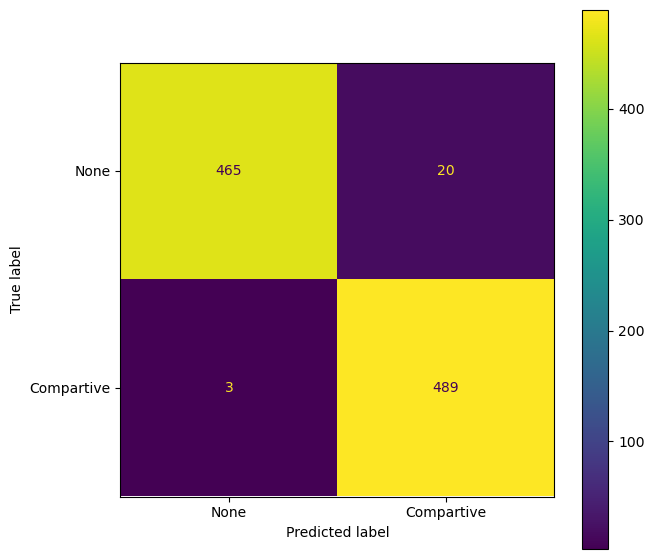





 tree
Training Accuracy is 1.0
F1 Score is 0.977022977022977
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       485
           1       0.96      0.99      0.98       492

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



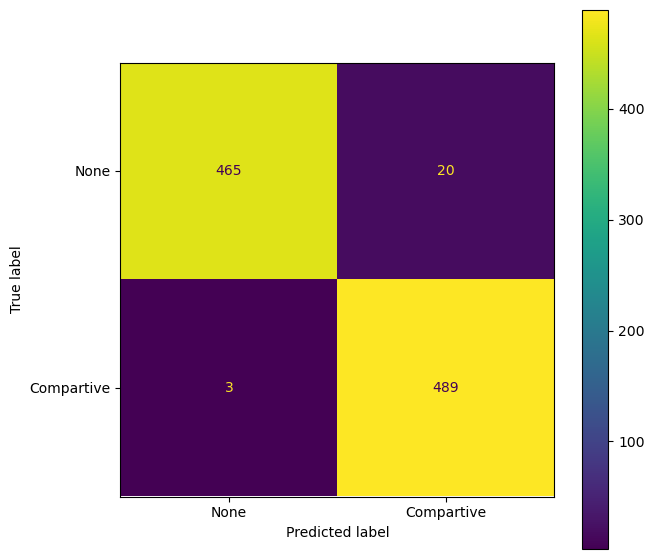





 XGB
Training Accuracy is 1.0
F1 Score is 0.977022977022977
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       485
           1       0.96      0.99      0.98       492

    accuracy                           0.98       977
   macro avg       0.98      0.98      0.98       977
weighted avg       0.98      0.98      0.98       977



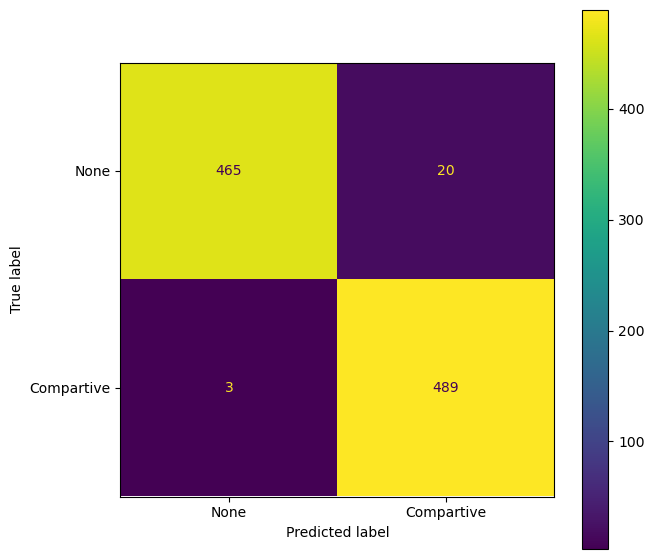

In [90]:
for name, model in models.items():
    print("\n\n\n\n",name)
    model.fit(x_train, y_train)
    print(F"Training Accuracy is {rf.score(x_train, y_train)}")
    y_pred = rf.predict(x_test)
    print(f"F1 Score is {f1_score(y_pred, y_test)}")
    print(classification_report(y_test, y_pred))  
    # specify axis with  figure size 
    fig,ax = plt.subplots(figsize=(7,7))
    # getting confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    # confusionMatraxDisplay is used to create a confusion matrix plot from confusion
    display_con = ConfusionMatrixDisplay(confusion,display_labels=['None',"Compartive"])
    # the confusion matrix with respect to axis defined above
    display_con.plot(ax=ax)
    plt.show()